In [393]:
import nbsetup
import numpy as np
import pandas as pd
import ensemblepy as ep
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [413]:
def distributions(count):
    return [np.random.uniform(0,1,count),
            np.random.normal(0.5, 0.1,count),
            np.random.exponential(0.1, size=count),
            np.random.normal(0.5, 0.001, count),
            np.random.normal(0.2, 0.001, count),
            np.ones(count)*0.2,
            ]



def plot(samples=10000, steps=1000):
    dists = distributions(samples)
    fig, axes = plt.subplots(2, len(dists), sharex=True, sharey=False, figsize=(15,5))
    
    for i, d in enumerate(dists):
        sns.histplot(d, ax=axes[0][i], stat='probability')
    
    for i, d in enumerate(dists):
        y, x = co(d, steps)
        sns.lineplot(x=x, y=y, ax=axes[1][i])
        print(so(y))

# Does it work?

0.9997051852604237
0.20735461018440388
0.1346911847291508
0.00017817513838518483
0.00017584610048109497
0.0001898785025908877


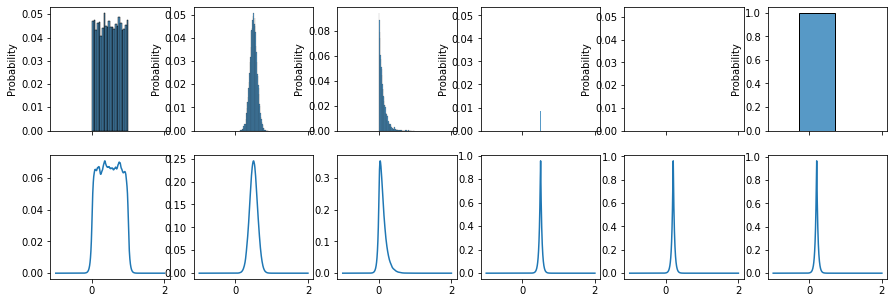

In [382]:
plot()

# Invariance to steps

0.9949894855838564
0.20290427085931484
0.13552108694372522
8.879243732418465e-05
8.955511260312225e-05
8.551817759888847e-06


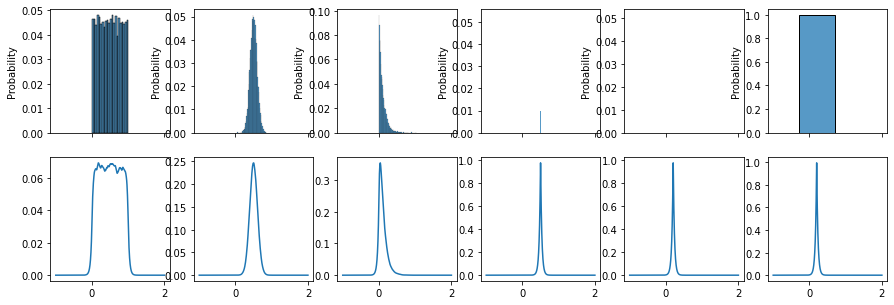

In [383]:
plot(steps=5000)

# Invariance to samples

0.9972967033265643
0.20387421934700867
0.13324221843077716
0.00017521269007775216
0.00017859453755815065
0.00018987850259886353


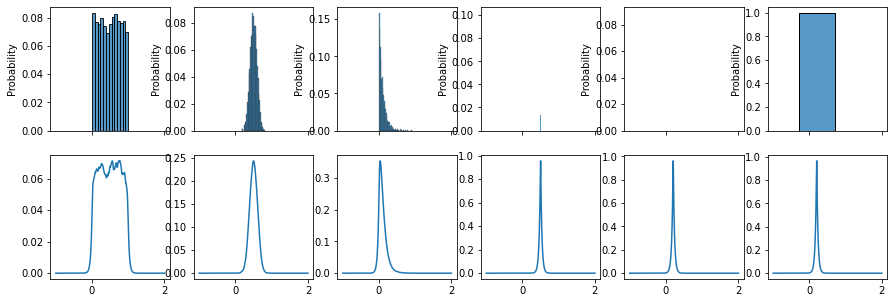

In [384]:
plot(samples=2000)

# Comparison against other techniques

In [416]:
def mixed(percent, count=5000):
    p = int(count*percent)
    if p == count: 
        return np.random.normal(0.5, 0.01, count)
    elif p == 0:
        return np.random.uniform(0, 1, count)
    else:
        return np.concatenate([np.random.normal(0.5, 0.01, p), np.random.uniform(0, 1, count-p)])
        

x = np.linspace(0,1,50)
data = []
for i in x:
    dist = mixed(i)
    data.append({
        'x': i,
        'y': so(co(dist)[0]),
        'hue': 'cont',
    })
    for b in ep.binint(2,1000,10):
        bins = ep.binspace(0,1,b)
        hist, _ = np.histogram(dist, bins=bins)
        data.append({
            'x': i,
            'y': sp.stats.entropy(hist)-np.log(b),
            'hue': b,
        })

data = pd.DataFrame(data)

<AxesSubplot:xlabel='x', ylabel='y'>

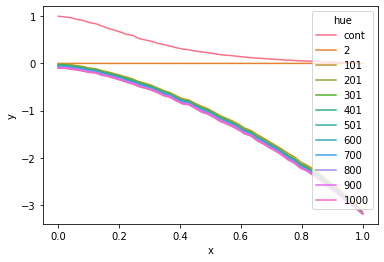

In [417]:
sns.lineplot(data=data, x='x', y='y', hue='hue')

# Creating invariance to boost

<AxesSubplot:>

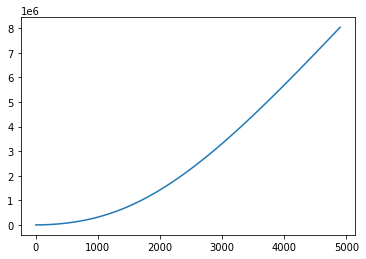

In [329]:
d = np.random.normal(0.5, 0.1, 1000)
x = range(1,5000,100)
y = [1/co(d, steps=100, boost=i)[0].var() for i in x]
sns.lineplot(x=x, y=y)

<AxesSubplot:>

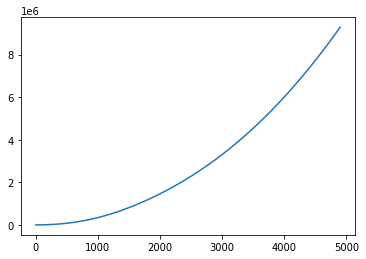

In [316]:
sns.lineplot(x=x, y=y)
#sns.lineplot(x=x, y=np.exp(np.array(x)/100))

In [363]:
X = 2 * np.random.randn(100, 5)
y = 1 / X[:, 0]
model = PySRRegressor(
    binary_operators=["+", "*"],
    unary_operators=["inv(x) = 1/x"],
    extra_sympy_mappings={"inv": lambda x: 1/x},
)
model.fit(X, y)
print(model)

/Users/timjdavey/Projects/complexity/lib/python3.9/site-packages/pysr/sr.py:1222: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


OSError: dlopen(/Applications/Julia-1.7.app/Contents/Resources/julia/lib/libjulia.1.7.dylib, 0x000A): tried: '/Applications/Julia-1.7.app/Contents/Resources/julia/lib/libjulia.1.7.dylib' (mach-o file, but is an incompatible architecture (have (arm64), need (x86_64)))